## MSDS 455 Data Visualization
## Assignment 3 Hierarchical & Part-to-Whole Data
## Melek Mizher
## Data used was sourced from Kaggle from a dataset added by Dan Ofer
## All the data used in the visualizations below focus on USP Drug Classification Data from 2018
##
### https://www.kaggle.com/datasets/danofer/usp-drug-classification

# Required Dependencies

In [40]:
#Required Dependency to get data hosted in GitHub with Requests and Pandas
#!pip install openpyxl
!pip install squarify

# Import Required Libraries

In [41]:
#Import
# For DataFrame Structure and Data Manipulation
import pandas as pd
# For Data Visualization
import matplotlib.pyplot as plt
# To use Numpy Arrays to allow Indexing of values from DataFrames
import numpy as np
# Seaborn
import seaborn as sns
from matplotlib import style
import squarify

# Data Setup

### Obtain data from GitHub Repository to ensure notebook operates in other computers

In [42]:
#Link to raw file in Github to download the Pre-Processed Spreadsheet
url='https://github.com/MelekM/Mizher_MSDS455_Assignment3_HierarchicalData/raw/main/Data/usp_drug_classification.csv'

### Extract Data of Interest From CSV into a Pandas DataFrame

In [43]:
df = pd.read_csv(url)

In [44]:
df

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,celecoxib,NaN,celecoxib,D00567,(JAN/USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac diethylamine,D07817,NaN
...,...,...,...,...,...,...,...
1798,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,sodium lactate,D02183,(JAN/USP)
1799,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,sodium ferric gluconate complex,D05859,(USAN)
1800,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,"sodium phosphate, monobasic",D04400,(USP)
1801,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,NaN,"sodium phosphate, dibasic",D05869,(USP)


## Removing unnecessary columns from data

In [45]:
df = df.drop(['kegg_id_drug', 'kegg_id_drug_example', 'nomenclature'], axis=1)

In [46]:
df

,usp_category,usp_class,usp_drug,drug_example
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,celecoxib,celecoxib
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,diclofenac
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,diclofenac potassium
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,diclofenac sodium
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,diclofenac diethylamine
...,...,...,...,...
1798,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,sodium lactate
1799,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,sodium ferric gluconate complex
1800,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,"sodium phosphate, monobasic"
1801,Therapeutic Nutrients/Minerals/Electrolytes,Electrolyte/Mineral Replacement,sodium,"sodium phosphate, dibasic"


# Data Indexing as a Proportion of Total Population By Insurance Status

In [51]:
category_count_df = df.groupby('usp_category', as_index=False)[['usp_class']].count()

In [52]:
category_count_df

,usp_category,usp_class
0,Analgesics,96
1,Anesthetics,4
2,Anti-Addiction/Substance Abuse Treatment Agents,20
3,Anti-inflammatory Agents,46
4,Antibacterials,196
5,Anticonvulsants,42
6,Antidementia Agents,9
7,Antidepressants,67
8,Antiemetics,52
9,Antimigraine Agents,28


In [49]:
class_count_df = df.groupby('usp_class', as_index=False)[['drug_example']].count()

In [50]:
class_count_df

,usp_class,drug_example
0,1st Generation/Typical,34
1,2nd Generation/Atypical,17
2,Alcohol Deterrents/Anti-craving,5
3,Alkylating Agents,11
4,Alpha-adrenergic Agonists,13
...,...,...
141,Treatment-Resistant,1
142,Tricyclics,18
143,Vaccines,22
144,"Vasodilators, Direct-acting Arterial",4


(0.0, 100.0, 0.0, 100.0)

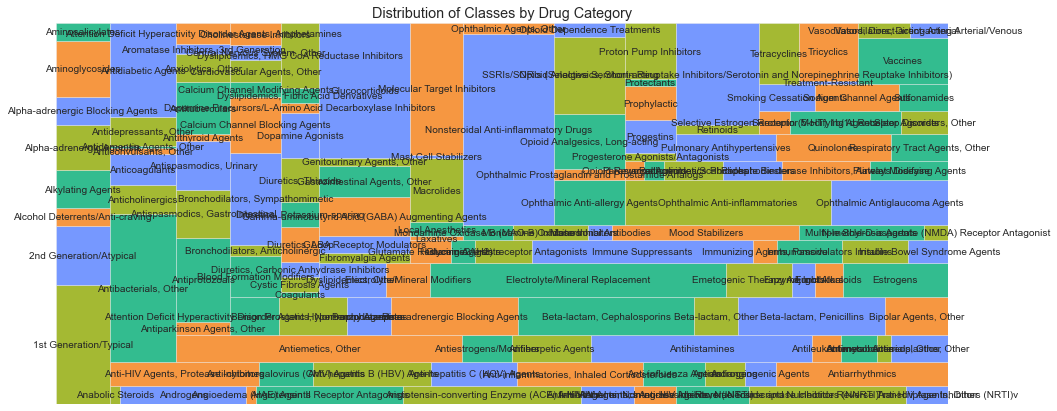

In [58]:
sns.set()

# Use ggplot style
style.use('ggplot')

colors = ("#8ea800", "#547eff", "#f47d12", "#00ab73")

# make large
plt.rcParams['figure.figsize'] = (16.0, 7.0)

# create treemap
squarify.plot(sizes=class_count_df['drug_example'], label=class_count_df['usp_class'], alpha=.8, color=colors)
plt.title("Distribution of Classes by Drug Category")
plt.axis('off')

In [ ]:
sns.set()

# Use ggplot style
style.use('ggplot')

colors = ("#8ea800", "#547eff", "#f47d12", "#00ab73")

# make large
plt.rcParams['figure.figsize'] = (16.0, 7.0)

# create treemap
squarify.plot(sizes=category_count_df['usp_class'], label=category_count_df['usp_category'], alpha=.8, color=colors)
plt.title("Distribution of Classes by Drug Category")
plt.axis('off')

# Data Exploration and Visualization

## Compare Education Attainment and Insurance Status in a Bar Plot

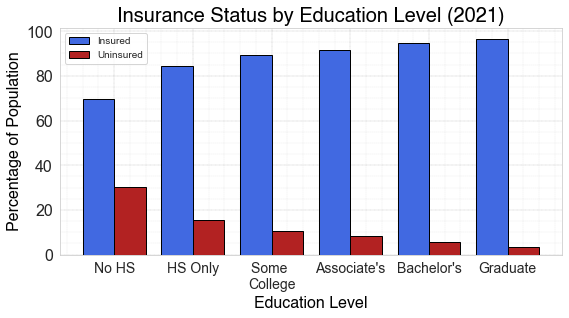

In [111]:
Insured_Educ = Insured[0:6]
Uninsured_Educ = Uninsured[0:6]

#Create Labels for the X-Axis
Education_Labels = ['No HS', 'HS Only', 'Some \nCollege', "Associate's", "Bachelor's", "Graduate"]

#Create Parameters for Double-Bar Plot
n = len(Insured_Educ)
r = np.arange(n)
width = 0.4

#Set Barplot Size
fig, ax = plt.subplots(figsize=(9,5))

#Set both of the bar plots
plt.bar(r, Insured_Educ, color = 'royalblue',
        width = width, edgecolor = 'black',
        label='Insured')
plt.bar(r + width, Uninsured_Educ, color = 'firebrick',
        width = width, edgecolor = 'black',
        label='Uninsured')

#Style Axis Labels
title_font = {'family':'helvetica','color':'black','size':20}
label_font = {'family':'helvetica','color':'black','size':16}

#Define Title
plt.title("Insurance Status by Education Level (2021)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Education Level", fontdict=label_font)
plt.ylabel("Percentage of Population", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
plt.autoscale(enable=True, axis='both', tight=None)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
plt.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
plt.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
plt.tick_params(which='minor', bottom=False, left=False)

#Sets the Axis Ticks spacing, labels, and font sizes
plt.yticks(fontsize=16)
plt.xticks(r + width/2, Education_Labels, fontsize=14)

#Adds the Legend
plt.legend()

#Prevents the Cutting Off of the Label at the Bottom of the Graph
plt.subplots_adjust(bottom=0.25)

#Save graph
plt.savefig('Insurance_Status_By_Education_Barplot.png')

#Shows the Plot
plt.show()

# Compare Citizenship Status and Insurance Status in a Bar Plot

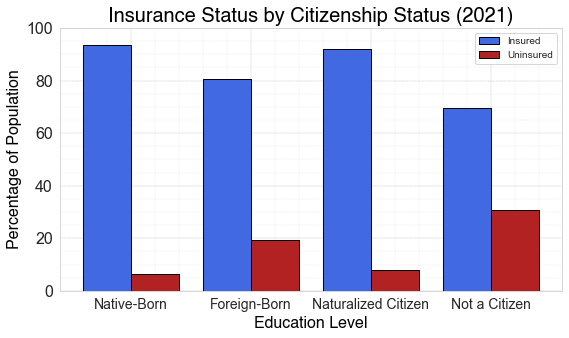

In [110]:
#Select Relevant Values from DataFrame
Insured_Cit = Insured[6:]
Uninsured_Cit = Uninsured[6:]

#Create Labels for the X-Axis
Citizen_Labels = ['Native-Born', 'Foreign-Born', 'Naturalized Citizen', 'Not a Citizen']

#Create Parameters for Double-Bar Plot
n = len(Insured_Cit)
r = np.arange(n)
width = 0.4

#Set Barplot Size
fig, ax = plt.subplots(figsize=(9,5))

#Set both of the bar plots
plt.bar(r, Insured_Cit, color = 'royalblue',
        width = width, edgecolor = 'black',
        label='Insured')
plt.bar(r + width, Uninsured_Cit, color = 'firebrick',
        width = width, edgecolor = 'black',
        label='Uninsured')

#Style Axis Labels
title_font = {'family':'helvetica','color':'black','size':20}
label_font = {'family':'helvetica','color':'black','size':16}
number_font = {'family':'helvetica','color':'black','size':20}

#Define Title
plt.title("Insurance Status by Citizenship Status (2021)", fontdict=title_font)

#Define Axis Labels
plt.xlabel("Education Level", fontdict=label_font)
plt.ylabel("Percentage of Population", fontdict=label_font)

#Auto-scale the Axes
#Autoscales both axes to ensure the data fits the plot.
plt.autoscale(enable=True, axis='both', tight=None)


#Design the Grid
#Adds the Grid line's Major Ticks and their Style
plt.grid(which='major', color='gray', linestyle='--', linewidth=0.25)
#Defines the Minor Ticks and their style
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.15)
#Turns on the Minor Ticks
plt.minorticks_on()
#Hides Minor Ticks while keeping the grid lines
plt.tick_params(which='minor', bottom=False, left=False)

#Fix to ensure that the Range Shows up to 100 on the Y-Axis labels instead of only 80
ax.set_ylim([0,100])

#Sets the Axis Ticks spacing, labels, and font sizes
plt.yticks(fontsize=16)
plt.xticks(r + width/2, Citizen_Labels, fontsize=14)

#Adds the Legend
plt.legend()

#Prevents the Cutting Off of the Label at the Bottom of the Graph
plt.subplots_adjust(bottom=0.15)

#Save graph
plt.savefig('Insurance_Status_By_Citizenship_Barplot.png')

#Shows the Plot
plt.show()